# MSDS 422 Assignment #1 - Exploring and Visualizing Data
by Ruchi Kumar

#### Description: Week 1 Assignment MSDS 422 - Practical Machine Learning

#### Topic: Conduct EDA, Feature Creation and Variable Transformation of COVID-19 Data

#### Data Source:  https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

#### Table of contents:

System and Data Setup

EDA and Visualization

Feature Creation

Scaling


## System and Data Setup

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

plt.style.use('fivethirtyeight')
%matplotlib inline

# Source data is from: https://www.ecdc.europa.eu/en/publications-data/data-national-14-day-notification-rate-covid-19
# Per the website, "The downloadable data file contains information on the 14-day notification rate of newly reported COVID-19 cases per 100 000 population and the 14-day notification rate of reported deaths per million population by week and country. Each row contains the corresponding data for a certain day and per country. The file is updated weekly. You may use the data in line with ECDC’s copyright policy."

data=pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-12-14.xlsx")


## EDA and Visualization

In [120]:
#Overview of data file
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [121]:
#Continuing to look at data at a high level
data.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
61895,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61899,2020-03-21,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [122]:
#Understanding how dataframe is organized and where there may be missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
dateRep                                                       61900 non-null datetime64[ns]
day                                                           61900 non-null int64
month                                                         61900 non-null int64
year                                                          61900 non-null int64
cases                                                         61900 non-null int64
deaths                                                        61900 non-null int64
countriesAndTerritories                                       61900 non-null object
geoId                                                         61625 non-null object
countryterritoryCode                                          61777 non-null object
popData2019                                                   61777 non-null float64
continentExp                                   

In [123]:
# This data covers daily COVID-19 cases and deaths from 2019 to 2020
# Of particular note to me are these items:
# 1.  Why are there negative deaths and cases?
# 2.  Does the daily case count and death have outliers that should be eliminated?  
data.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [124]:
# Brief look if the factors are correlated
data.corr()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
day,1.000000,-0.109482,-0.057227,-0.004040,-0.006628,-0.002848,-0.014133
month,-0.109482,1.000000,-0.054955,0.118790,0.068335,-0.049900,0.310703
year,-0.057227,-0.054955,1.000000,0.005607,0.006536,-0.010016,NaN
cases,-0.004040,0.118790,0.005607,1.000000,0.743544,0.308378,0.225204
deaths,-0.006628,0.068335,0.006536,0.743544,1.000000,0.273159,0.178449
popData2019,-0.002848,-0.049900,-0.010016,0.308378,0.273159,1.000000,-0.045433
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,-0.014133,0.310703,NaN,0.225204,0.178449,-0.045433,1.000000


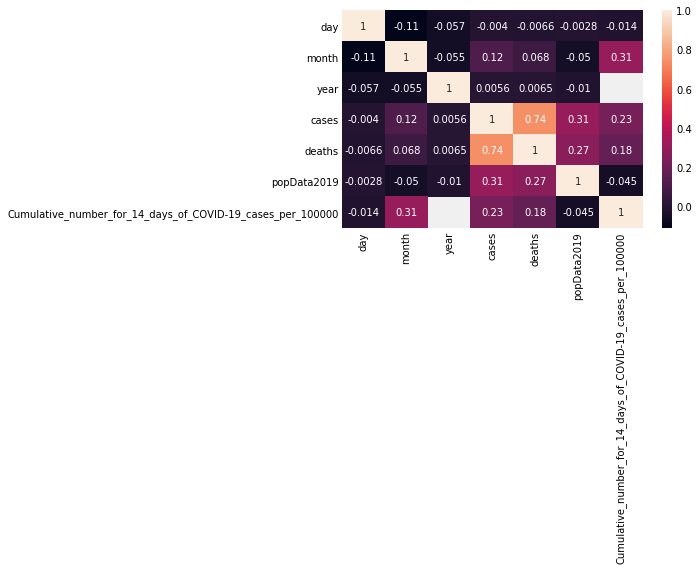

In [125]:
# Visual of correlation matrix
# It seems intuitive that cases and dates appear to be correlated
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [126]:
df_America = data.loc[data['countriesAndTerritories'] == 'United_States_of_America']

In [127]:
# Validating data seems reasonable, US case loads increasing towards end of year.
df_America.loc[df_America['cases'] >= 100000]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
59001,2020-12-14,14,12,2020,189723,1340,United_States_of_America,US,USA,329064917.0,America,873.211592
59002,2020-12-13,13,12,2020,216017,2315,United_States_of_America,US,USA,329064917.0,America,857.089241
59003,2020-12-12,12,12,2020,234633,3343,United_States_of_America,US,USA,329064917.0,America,838.514183
59004,2020-12-11,11,12,2020,224680,2748,United_States_of_America,US,USA,329064917.0,America,830.394205
59005,2020-12-10,10,12,2020,220025,3124,United_States_of_America,US,USA,329064917.0,America,794.356027
59006,2020-12-09,9,12,2020,217344,2564,United_States_of_America,US,USA,329064917.0,America,784.195114
59007,2020-12-08,8,12,2020,197334,1433,United_States_of_America,US,USA,329064917.0,America,769.896719
59008,2020-12-07,7,12,2020,173432,1111,United_States_of_America,US,USA,329064917.0,America,762.794473
59009,2020-12-06,6,12,2020,211933,2203,United_States_of_America,US,USA,329064917.0,America,757.944062
59010,2020-12-05,5,12,2020,231930,2680,United_States_of_America,US,USA,329064917.0,America,746.870564


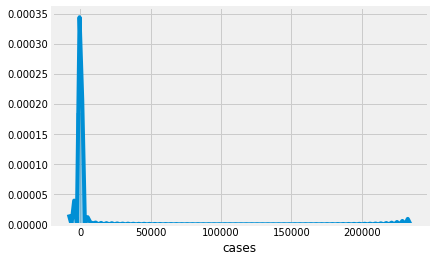

In [128]:
# Seeing how daily number of cases by country are distributed 
# Note negative cases, need to understand what this represents (is it a correction of days past?)
# long right side tail as cases grow
sns.distplot(data["cases"])

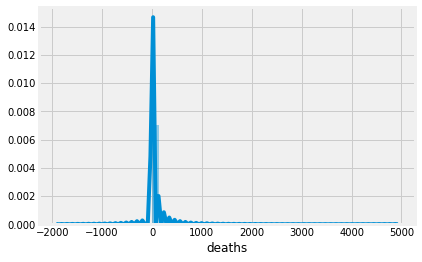

In [129]:
# Seeing how deaths are distributed 
# Note negative deaths, need to understand what this represents (is it a correction of previous days?)
sns.distplot(data["deaths"])

In [130]:
# Interesting to see which countries have the highest total number of cases in this timeframe 
# The United States is the highest
highest_cases = data.groupby('countriesAndTerritories')['cases'].sum().sort_values().tail(15)
highest_cases

countriesAndTerritories
Turkey                        995471
Iran                         1108269
Poland                       1135676
Mexico                       1250044
Germany                      1337078
Colombia                     1425774
Argentina                    1498160
Spain                        1730575
Italy                        1843712
United_Kingdom               1849403
France                       2376852
Russia                       2653928
Brazil                       6901952
India                        9884100
United_States_of_America    16256754
Name: cases, dtype: int64

In [131]:
# Total cases for all countries 
# One finding is that many islands have managed to effectively isolate from COVID-19
total_cases_by_geo = data.groupby('countriesAndTerritories')['cases'].sum().sort_values()
total_cases_by_geo

countriesAndTerritories
Vanuatu                                     1
Wallis_and_Futuna                           3
Marshall_Islands                            4
Anguilla                                   10
Montserrat                                 13
Solomon_Islands                            17
Greenland                                  19
Falkland_Islands_(Malvinas)                19
Holy_See                                   26
Saint_Kitts_and_Nevis                      27
Timor_Leste                                31
New_Caledonia                              36
Laos                                       41
Fiji                                       46
Grenada                                    69
British_Virgin_Islands                     76
Dominica                                   87
Saint_Vincent_and_the_Grenadines           98
Northern_Mariana_Islands                  113
Antigua_and_Barbuda                       148
Brunei_Darussalam                         152
Bonaire, S

In [132]:
# Which countries have the highest number of total deaths from COVID-19 
# Note US is highest again
highest_deaths= data.groupby('countriesAndTerritories')['deaths'].sum().sort_values().tail(15)
highest_deaths

countriesAndTerritories
Poland                       22864
South_Africa                 23276
Peru                         36677
Colombia                     39053
Argentina                    40766
Russia                       46941
Spain                        47624
Iran                         52196
France                       57911
United_Kingdom               64170
Italy                        64520
Mexico                      113953
India                       143355
Brazil                      181402
United_States_of_America    299177
Name: deaths, dtype: int64

In [133]:
# List of total deaths for all countries in this file
# If countries had a low number of cases, it explains why the corresponding death rate is low
# However, may want to understand why couuntries like Eritrea and Mongolia have zero deaths
total_deaths_by_geo = data.groupby('countriesAndTerritories')['deaths'].sum().sort_values()
total_deaths_by_geo

countriesAndTerritories
Faroe_Islands                             0
Falkland_Islands_(Malvinas)               0
Dominica                                  0
Laos                                      0
Solomon_Islands                           0
Saint_Kitts_and_Nevis                     0
Timor_Leste                               0
Greenland                                 0
Grenada                                   0
Cambodia                                  0
Seychelles                                0
Bhutan                                    0
Vanuatu                                   0
Marshall_Islands                          0
Holy_See                                  0
Eritrea                                   0
New_Caledonia                             0
Wallis_and_Futuna                         0
Saint_Vincent_and_the_Grenadines          0
Mongolia                                  0
Anguilla                                  0
Montserrat                                1
Western_

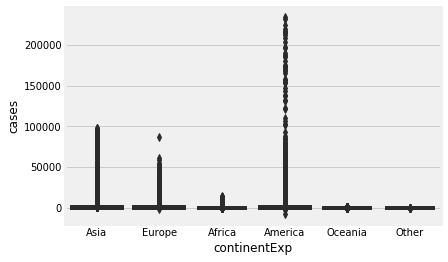

In [134]:
# This illustrates that boxplots may not be the best way to look at exponential growth
sns.boxplot(x = 'continentExp', y = 'cases', data = data )

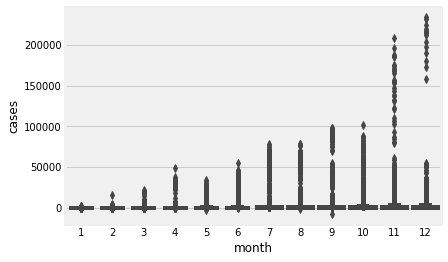

In [135]:
# This illustrates that boxplots may not be the best way to look at exponential growth
sns.boxplot(x = 'month', y = 'cases', data = data)

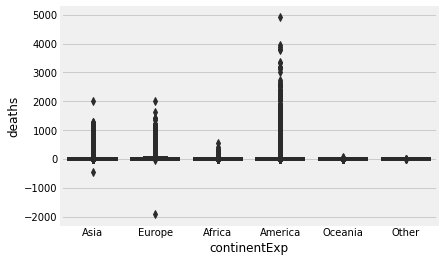

In [136]:
# This illustrates that boxplots may not be the best way to look at exponential growth
sns.boxplot(x = 'continentExp', y = 'deaths', data = data)

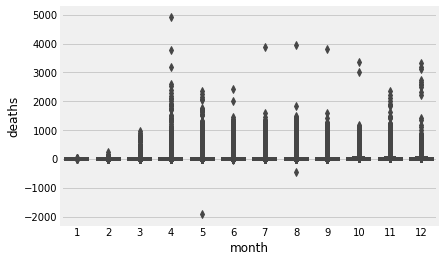

In [137]:
# This illustrates that boxplots may not be the best way to look at exponential growth
sns.boxplot(x = 'month', y = 'deaths', data = data )

In [138]:
# Total Cases by Month (December is partial month)
total_cases_by_date = data.groupby('month')['cases'].sum()
total_cases_by_date

month
1         9799
2        75422
3       723738
4      2339594
5      2891996
6      4249525
7      7067524
8      7963836
9      8456248
10    11949041
11    17134026
12     8642865
Name: cases, dtype: int64

In [139]:
# Total Death by Month (December is partial month)
total_deaths_by_date = data.groupby('month')['deaths'].sum()
total_deaths_by_date

month
1        213
2       2708
3      35814
4     189180
5     140142
6     134069
7     166195
8     178618
9     162169
10    181054
11    271086
12    151585
Name: deaths, dtype: int64

In [140]:
# Total Cases by Continent 
total_cases_by_cont = data.groupby('continentExp')['cases'].sum()
total_cases_by_cont

continentExp
Africa      2379827
America    30887593
Asia       16782046
Europe     21400012
Oceania       53440
Other           696
Name: cases, dtype: int64

In [141]:
# Total Deaths by Continent 
total_deaths_by_cont = data.groupby('continentExp')['deaths'].sum()
total_deaths_by_cont

continentExp
Africa      56334
America    785420
Asia       290129
Europe     479789
Oceania      1154
Other           7
Name: deaths, dtype: int64

In [142]:
# COVID Case Fatality Rate by Continent
# Calculate as (COVID Deaths/COVID Cases)*100
# Should this be calculated with a delay?

case_fatality_rate_cont = data.groupby('continentExp')['deaths'].sum()/data.groupby('continentExp')['cases'].sum()
case_fatality_rate_cont

continentExp
Africa     0.023671
America    0.025428
Asia       0.017288
Europe     0.022420
Oceania    0.021594
Other      0.010057
dtype: float64

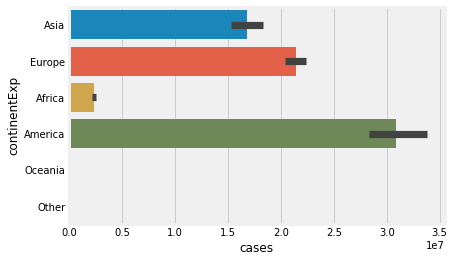

In [143]:
# Barplot of COVID Cases by Continent

sns.barplot(y = 'continentExp', x = 'cases',
           data = data, estimator = sum)

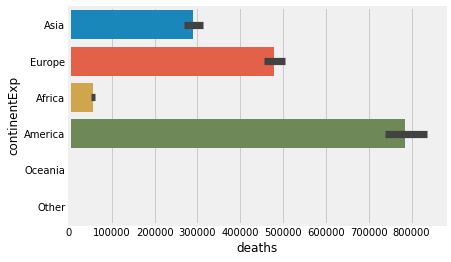

In [144]:
# Barplot of COVID Deaths by Continent

sns.barplot(y = 'continentExp', x = 'deaths',
           data = data, estimator = sum)

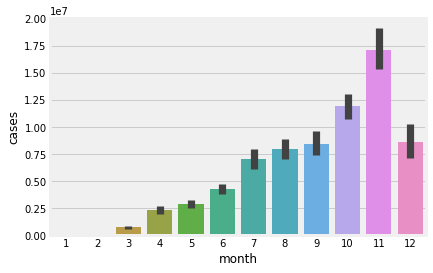

In [145]:
# Barplot of COVID cases by Month (December is a partial month)

sns.barplot(x = 'month', y = 'cases', data = data, estimator = sum)

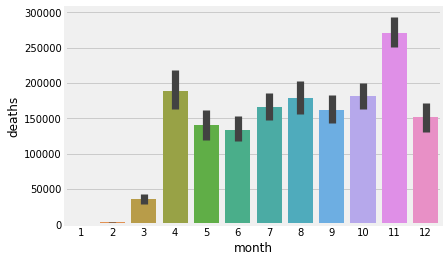

In [146]:
# Barplot of COVID deaths by Month (December is a partial month)

sns.barplot(x = 'month', y = 'deaths', data = data, estimator = sum)

In [147]:
# Deaths by Continent over time

total_deaths_Africa =  data[(data["continentExp"] == 'Africa')]
total_deaths_America =  data[(data["continentExp"] == 'America')]
total_deaths_Asia =  data[(data["continentExp"] == 'Asia')]
total_deaths_Europe =  data[(data["continentExp"] == 'Europe')]
total_deaths_Oceania =  data[(data["continentExp"] == 'Oceania')]
total_deaths_Other =  data[(data["continentExp"] == 'Other')]


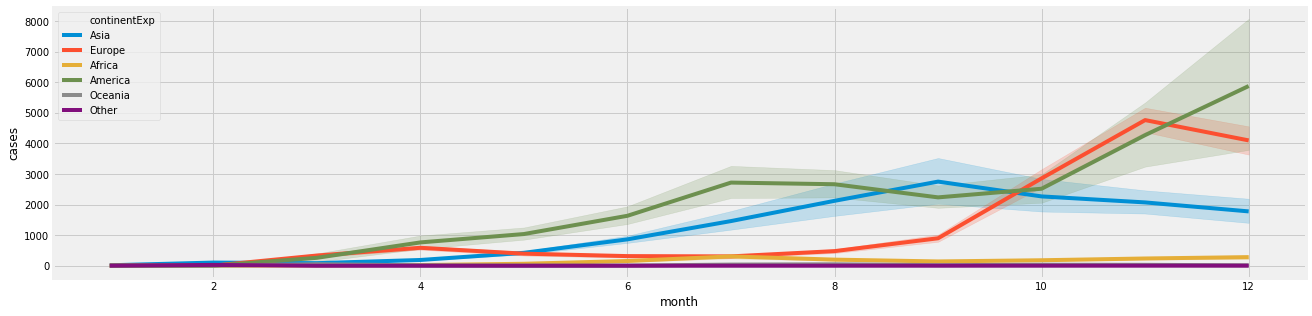

In [148]:
# Time Series Data of Cases by Month
# America (the Continent) has the highest number of cases as we enter December

plt.figure(figsize = (20,5))
fig1 = sns.lineplot(data = data, x = 'month', y = 'cases', hue = 'continentExp')

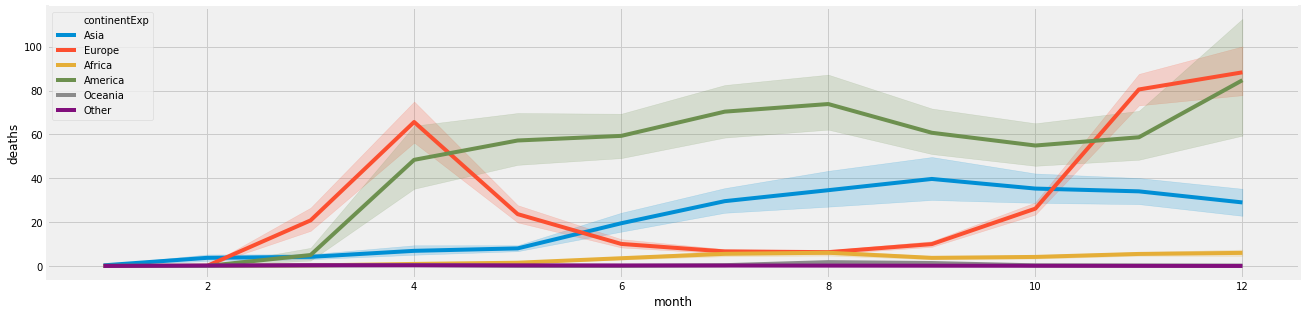

In [149]:
# Time Series Data of Deaths by Month
# But interestingly, Europe's death toll tops American in November and December

plt.figure(figsize = (20,5))
fig1 = sns.lineplot(data = data, x = 'month', y = 'deaths', hue = 'continentExp')

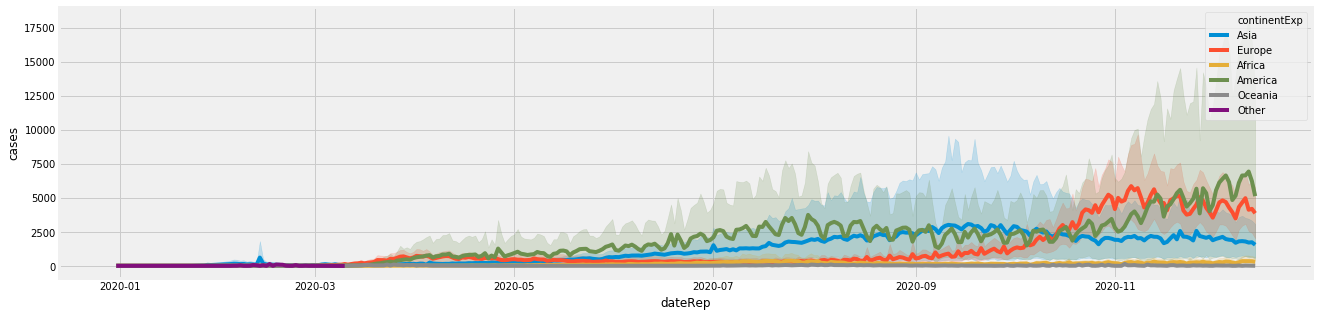

In [150]:
# Time Series Data of Cases by day
# In this case, the monthly data seems to be easier to visually interpret

plt.figure(figsize = (20,5))
fig1 = sns.lineplot(data = data, x = 'dateRep', y = 'cases', hue = 'continentExp')

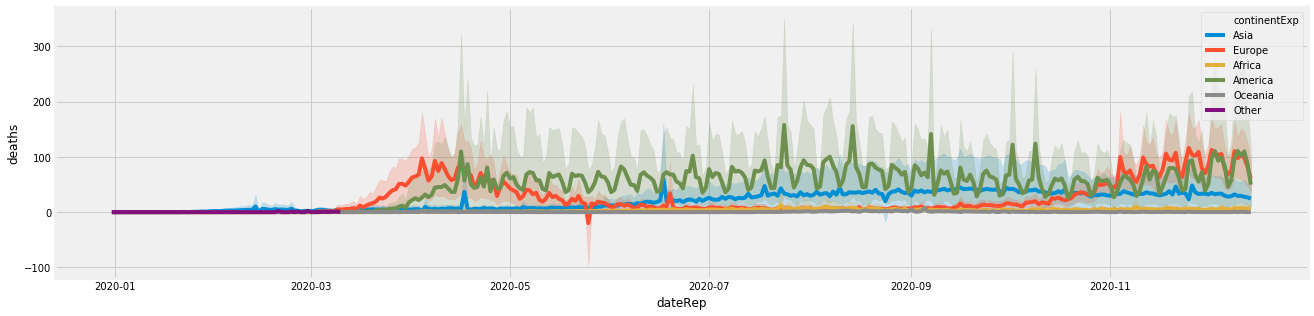

In [151]:
# Time Series Data of Deaths by day
# In this case, the monthly data seems to be easier to visually interpret

plt.figure(figsize = (20,5))
fig1 = sns.lineplot(data = data, x = 'dateRep', y = 'deaths', hue = 'continentExp')

## Feature Creation

In [152]:
# COVID Case Fatality Rate
# Calculate as (COVID Deaths/COVID Cases)*100

case_fatality_rate = data.groupby('countriesAndTerritories')['deaths'].sum()/data.groupby('countriesAndTerritories')['cases'].sum()
case_fatality_rate

countriesAndTerritories
Afghanistan                          0.040002
Albania                              0.020668
Algeria                              0.028186
Andorra                              0.010766
Angola                               0.022918
Anguilla                             0.000000
Antigua_and_Barbuda                  0.027027
Argentina                            0.027211
Armenia                              0.016835
Aruba                                0.009111
Australia                            0.032393
Austria                              0.013748
Azerbaijan                           0.010928
Bahamas                              0.021241
Bahrain                              0.003904
Bangladesh                           0.014376
Barbados                             0.023973
Belarus                              0.007879
Belgium                              0.029525
Belize                               0.020979
Benin                                0.014239
Bermuda   

In [153]:
# Calculate Cases Per Million
data["casespermillion"] = (data["cases"]/data["popData2019"])*1000000

In [154]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,casespermillion
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,19.610030
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,7.833497
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2.970420
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,1.656075
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,5.309955


In [155]:
data["deathspermillion"] = (data["deaths"]/data["popData2019"])*1000000

In [156]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,casespermillion,deathspermillion
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,19.610030,0.157721
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,7.833497,0.236582
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2.970420,0.289156
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,1.656075,0.262869
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,5.309955,0.420590


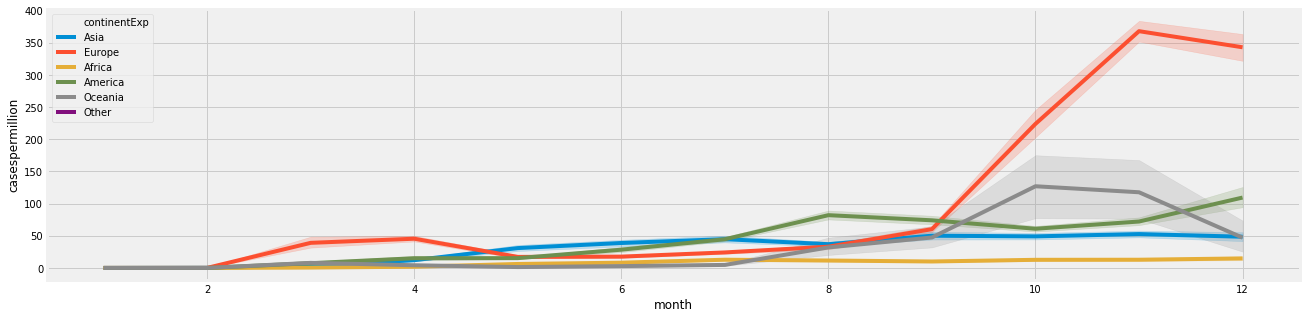

In [157]:
# Time Series Data of Cases per Million by Month
# Europe has the highest number of cases per million beginning around September
# This illustrates why feature creation is so important - this was not visible in the above graph

plt.figure(figsize = (20,5))
fig1 = sns.lineplot(data = data, x = 'month', y = 'casespermillion', hue = 'continentExp')

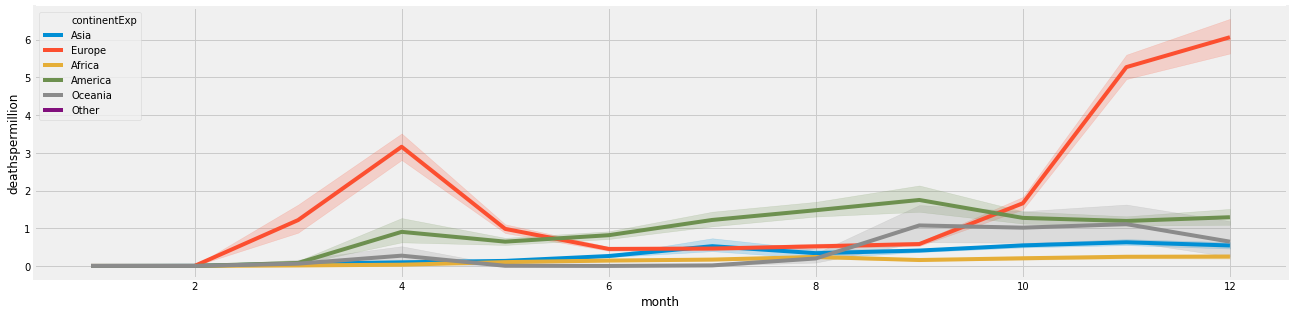

In [158]:
# Time Series Data of Deaths per Million by Month
# Europe has the highest number of deaths per million beginning October

plt.figure(figsize = (20,5))
fig1 = sns.lineplot(data = data, x = 'month', y = 'deathspermillion', hue = 'continentExp')

## Scaling

In [159]:
# MinMaxScaler of Cases
# Min-max scaling technique which results 
# in scaled data values that fall in the range [0,1].

mm_scaler = MinMaxScaler()
scaled_cases = mm_scaler.fit_transform(data[["cases"]])

In [160]:
scaled_cases

array([[0.03708202],
       [0.03523759],
       [0.03447594],
       ...,
       [0.03401072],
       [0.03401484],
       [0.03401484]])

In [161]:
# StandardScaler of Cases
# Standard Scaler works to standardize features by removing the mean and scaling to unit variance
# The resulting data will have a mean = 0 and standard deviation = 1

ss_scaler = StandardScaler()
standard_scaled_cases = ss_scaler.fit_transform(data[["cases"]])

In [162]:
standard_scaled_cases

array([[-0.06035359],
       [-0.12643838],
       [-0.15372786],
       ...,
       [-0.17039657],
       [-0.17024905],
       [-0.17024905]])

In [163]:
data['cases']

0        746
1        298
2        113
3         63
4        202
5        135
6        200
7        210
8        234
9        235
10       119
11       202
12       400
13       272
14         0
15       228
16       214
17         0
18       200
19       185
20       246
21       252
22       154
23       232
24       282
25         0
26       383
27        65
28       163
29       205
        ... 
61870      1
61871      0
61872      1
61873      6
61874      0
61875      3
61876      0
61877      3
61878      0
61879      0
61880      1
61881      1
61882      0
61883      0
61884      0
61885      1
61886      0
61887      0
61888      1
61889      0
61890      0
61891      2
61892      2
61893      0
61894      1
61895      0
61896      0
61897      0
61898      1
61899      1
Name: cases, Length: 61900, dtype: int64

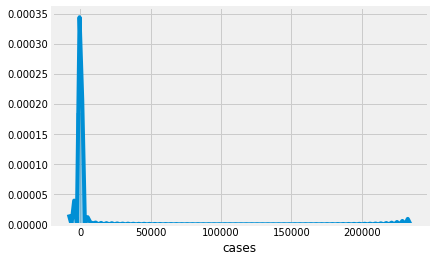

In [164]:
# Plot of Cases that has not been transformed
sns.distplot(data['cases'])

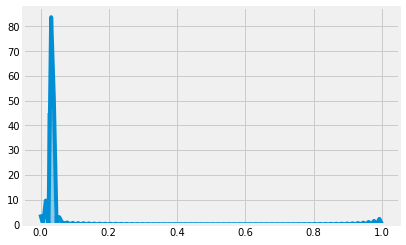

In [165]:
# Data is transformed as expected, in a range from 0 to 1
sns.distplot(scaled_cases)

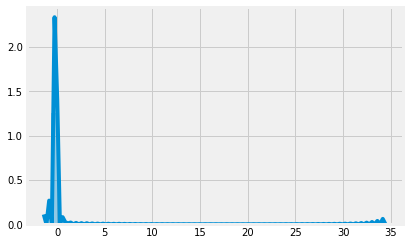

In [166]:
# Data is transformed as expected, witha mean of 0
sns.distplot(standard_scaled_cases)